# yapay sinir ağı: 
* temelde lojistik regresyon modelini alınıp ardarda en az 2 kez tekraralanmasıyla oluşur. lofistik regresyon modeli 1 katmanlı bir modeldir, sinir ağları ise en az 2 katmandan oluşan yapılardır.
* lojistik regresyonda, sadece girdi ve çıktı katmanları vardır. ancak sinir ağında giriş ve çıkış katmanı arasında en az bir gizli katman vardır. 
derin ogrenme son(35. dakika) tekrar izle

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [3]:
veri = pd.read_csv("egitim.csv")
print("Verinin Boyutu: ",veri.shape) 
veri.head()

Verinin Boyutu:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label_filtre0 = 0
label_filtre1 = 1
veri = pd.concat([veri[veri["label"]==label_filtre0], 
                  veri[veri["label"]==label_filtre1]], axis=0)
veri.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# label ayarlama
Y_veri = veri["label"]

# x egitim veri seti olusturma
X_veri = veri.drop(["label"], axis=1)
print("X veri: ", X_veri.shape)
print("Y veri: ", Y_veri.shape)

X veri:  (8816, 784)
Y veri:  (8816,)


In [6]:
# resmin boyutunu kullanacağız
resim_boyutu = int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

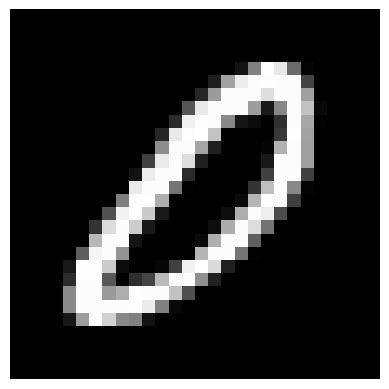

In [7]:
# verimizi görselleştirelim 0 sınıfı
resim1 = X_veri.iloc[900].values
resim1 = resim1.reshape((resim_boyutu,resim_boyutu))
plt.imshow(resim1,cmap='gray')
plt.axis('off')
plt.show()

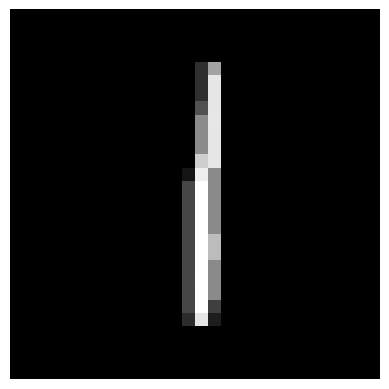

In [8]:
resim2 = X_veri.iloc[8000].values
resim2 = resim2.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim2, cmap='gray')
plt.axis('off')
plt.show() 

In [9]:
# egitim test bölmesi
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_veri, Y_veri, test_size=0.15, random_state=42)
print("x egitim: ", X_egitim.shape)
print("x test: ", X_test.shape)

x egitim:  (7493, 784)
x test:  (1323, 784)


In [10]:
x_egitim = X_egitim.T 
x_test = X_test.T
y_egitim = Y_egitim.values.reshape(-1,1).T
y_test = Y_test.values.reshape(-1,1).T
print(" x egitim: ", x_egitim.shape)
print(" x test: ", x_test.shape)
print(" y egitim: ", y_egitim.shape)
print(" y test: ", y_test.shape)

 x egitim:  (784, 7493)
 x test:  (784, 1323)
 y egitim:  (1, 7493)
 y test:  (1, 1323)


ilklendirme

In [1]:
def layerSayisiniParametreleriIlklendir(x_train, y_train):
    parameters= {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                 "bias1": np.zeros((3,1)),
                 "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                 "bias2": np.zeros((y_train.shape[0],1))}
    return parameters


In [12]:
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head
sigmoid(0)

0.5

In [19]:
def ileriYayilmaNN(x_train, parameters):
    Z1 = np.dot(parameters["weight"], x_train)+parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["wight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

Kayıp ve Maliyet Fonksiyonları
* kayıp ve maliyet fonksiyonları lojistik regresyon ile aynıdır.
* çapraz entropi fonksiyonu

In [14]:
#maliyet hesabı
def maliyetHesaplaNN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [15]:
# Backward Propagation
def geriyeYayilmaNN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads 

In [16]:
# update parameters
# agirlik ve egilim parametresi guncelleme
def parametreGuncelleNN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [17]:
# tahmin
def tahminNN(parameters,x_test):
    
    # x test ileri yayilma girdisidir.
    A2, cache = ileriYayilmaNN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    # eğer z 0.5'den büyükse, 1 sınıfına ait resimler
    # eğer z 0.5'den küçükse, 0 sınıfına ait resimler
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [20]:
# 2 - katmanlı sinir ağı
def ikiKatmanNN(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    # ilklendirme
    parameters = layerSayisiniParametreleriIlklendir(x_train, y_train)

    for i in range(0, num_iterations):
         # ileri yayılım
        A2, cache = ileriYayilmaNN(x_train,parameters)
        # maliyet hesapla
        cost = maliyetHesaplaNN(A2, y_train, parameters)
         # geriye yayılım
        grads = geriyeYayilmaNN(parameters, cache, x_train, y_train)
         # parametreleri güncelle
        parameters = parametreGuncelleNN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("İterasyon: %i, Maliyet: %f" %(i, cost))
            
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("İterasyon Sayisi")
    plt.ylabel("Maliyet")
    plt.show()
    
    # predict
    y_prediction_test = tahminNN(parameters,x_test)
    y_prediction_train = tahminNN(parameters,x_train)

    # eğitim ve test doğruluğu
    print("Eğitim Doğruluğu: {} %".
          format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Test Doğruluğu: {} %".
          format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = ikiKatmanNN(x_egitim, y_egitim,x_test,y_test, num_iterations=1000)

KeyError: 'weight'